# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}" 
    
    #url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        #from Xpert learning
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | antofagasta
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | kununurra
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | kone
Processing Record 10 of Set 1 | khamis mushait
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | erenhot
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | sao jose da coroa grande
Processing Record 18 of Set 1 | forster
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | hastings
Processing Record 21 of Set 1 | sao gabriel da cachoei

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,251.04,59,100,0.00,US,1706587877
1,antofagasta,-23.6500,-70.4000,293.75,80,32,2.21,CL,1706588125
2,bilibino,68.0546,166.4372,242.42,99,100,1.91,RU,1706588063
3,ribeira grande,38.5167,-28.7000,289.69,91,100,5.36,PT,1706587912
4,bredasdorp,-34.5322,20.0403,292.57,77,98,0.71,ZA,1706587913


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data_mod6/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data_mod6/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,251.04,59,100,0.00,US,1706587877
1,antofagasta,-23.6500,-70.4000,293.75,80,32,2.21,CL,1706588125
2,bilibino,68.0546,166.4372,242.42,99,100,1.91,RU,1706588063
3,ribeira grande,38.5167,-28.7000,289.69,91,100,5.36,PT,1706587912
4,bredasdorp,-34.5322,20.0403,292.57,77,98,0.71,ZA,1706587913


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

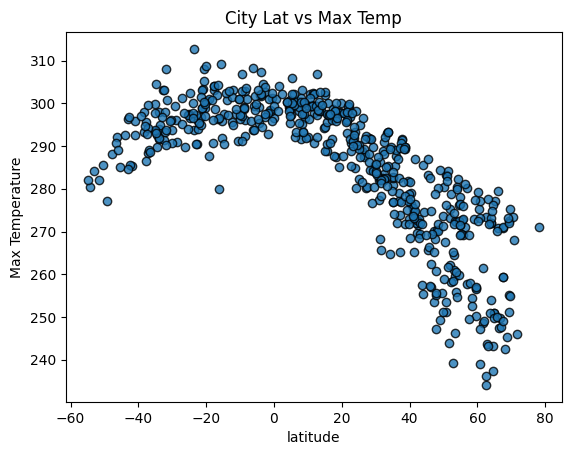

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolors= "black",
    linewidths= 1,
    marker= "o",
    alpha= 0.8,
    label= "cities"
)

# Incorporate the other graph properties
plt.title("City Lat vs Max Temp")
plt.xlabel("latitude")
plt.ylabel("Max Temperature")
plt.grid(False)

# Save the figure
plt.savefig("../output_data_mod6/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

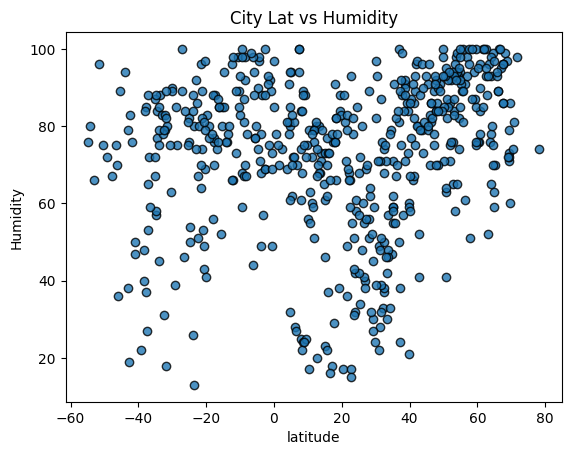

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolors= "black",
    linewidths= 1,
    marker= "o",
    alpha= 0.8,
    label= "cities"
)

# Incorporate the other graph properties
plt.title("City Lat vs Humidity")
plt.xlabel("latitude")
plt.ylabel("Humidity")
plt.grid(False)

# Save the figure
plt.savefig("../output_data_mod6/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

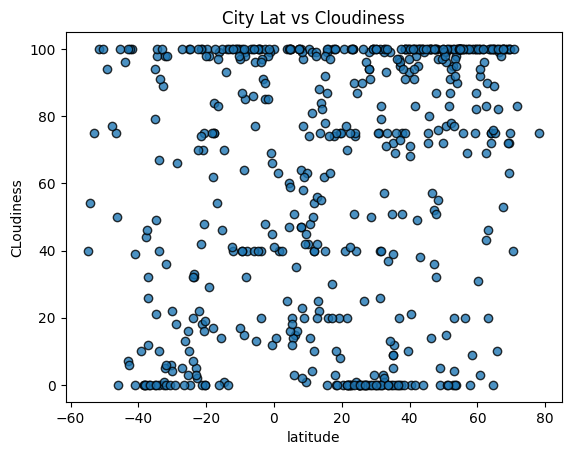

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolors= "black",
    linewidths= 1,
    marker= "o",
    alpha= 0.8,
    label= "cities"
)

# Incorporate the other graph properties
plt.title("City Lat vs Cloudiness")
plt.xlabel("latitude")
plt.ylabel("CLoudiness")
plt.grid(False)

# Save the figure
plt.savefig("../output_data_mod6/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

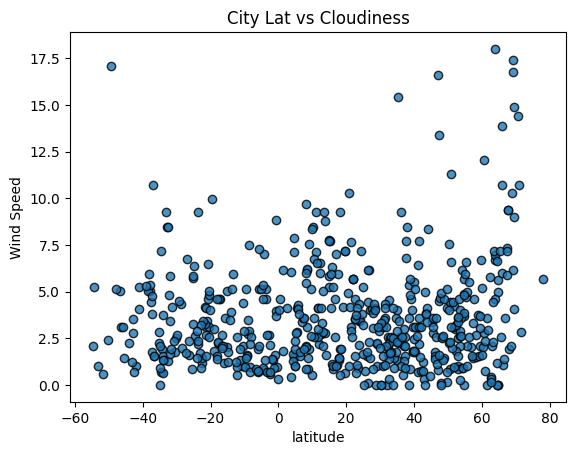

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolors= "black",
    linewidths= 1,
    marker= "o",
    alpha= 0.8,
    label= "cities"
)

# Incorporate the other graph properties
plt.title("City Lat vs Cloudiness")
plt.xlabel("latitude")
plt.ylabel("Wind Speed")
plt.grid(False)

# Save the figure
plt.savefig("../output_data_mod6/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


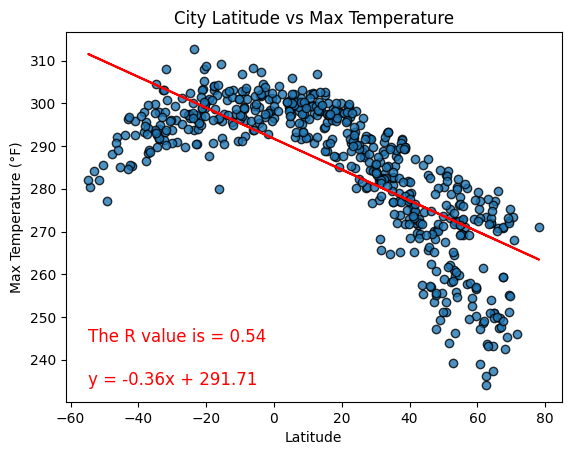

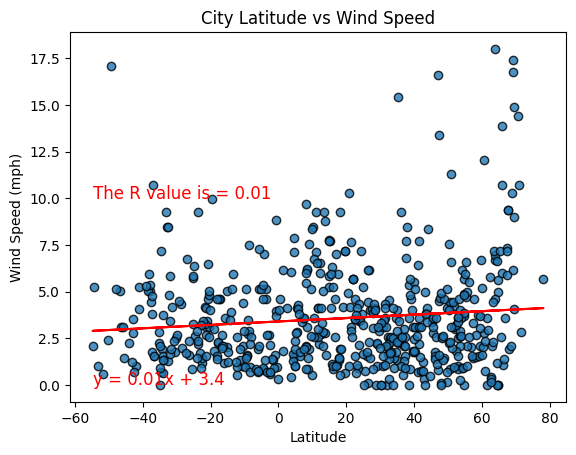

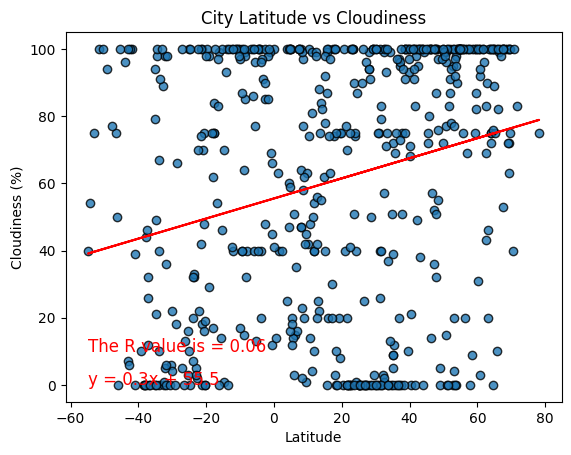

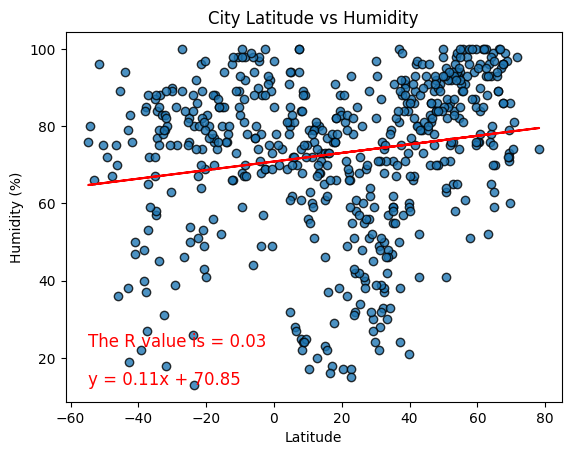

In [38]:
# Define a function to Create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", linewidths=1, marker="o", alpha=0.8)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Add equation and R-value to the graph
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.annotate(f"The R value is = {round(rvalue**2, 2)}", (min(x_values), min(y_values) + 10), fontsize=12, color="red")
    
    # Set graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    
    # Save the figure
    plt.savefig(file_name)
    
    # Show the plot
    plt.show()

# Call the function for each relationship
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (°F)", "City Latitude vs Max Temperature", "Lat_vs_Max_Temp.png")
plot_linear_regression(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "City Latitude vs Wind Speed", "Lat_vs_Wind_Speed.png")
plot_linear_regression(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude", "Cloudiness (%)", "City Latitude vs Cloudiness", "Lat_vs_Cloudiness.png")
plot_linear_regression(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity (%)", "City Latitude vs Humidity", "Lat_vs_Humidity.png")


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,251.04,59,100,0.00,US,1706587877
2,bilibino,68.0546,166.4372,242.42,99,100,1.91,RU,1706588063
3,ribeira grande,38.5167,-28.7000,289.69,91,100,5.36,PT,1706587912
9,khamis mushait,18.3064,42.7292,287.49,82,0,9.26,SA,1706588215
12,erenhot,43.6475,111.9767,257.55,79,100,3.83,CN,1706588215


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,antofagasta,-23.6500,-70.4000,293.75,80,32,2.21,CL,1706588125
4,bredasdorp,-34.5322,20.0403,292.57,77,98,0.71,ZA,1706587913
5,kununurra,-15.7667,128.7333,309.14,52,14,3.60,AU,1706587929
6,puerto natales,-51.7236,-72.4875,282.05,96,100,0.59,CL,1706587920
7,port-aux-francais,-49.3500,70.2167,277.12,72,94,17.08,TF,1706588059


###  Temperature vs. Latitude Linear Regression Plot

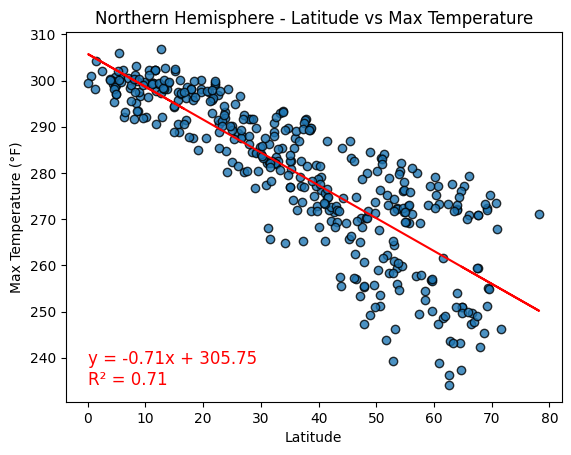

In [44]:
# Linear regression on Northern Hemisphere Temp
# Define x and y values for Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(x_values_northern, y_values_northern)

# Calculate the regression line
regress_values = x_values_northern * slope + intercept

# Create equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value**2:.2f}"

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Plot regression line
plt.plot(x_values_northern, regress_values, color="red")

# Annotate equation on the plot
plt.annotate(equation, (x_values_northern.min(), y_values_northern.min()), fontsize=12, color="red")

# Incorporate graph properties
plt.title("Northern Hemisphere - Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(False)

# Save the figure
plt.savefig("Northern_Lat_vs_Max_Temp.png")

# Show the plot
plt.show()


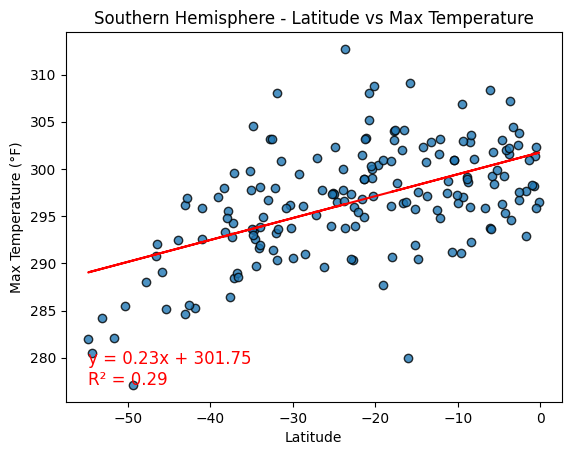

In [46]:
# Linear regression on Southern Hemisphere
# Define x and y values for Northern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(x_values_southern, y_values_southern)

# Calculate the regression line
regress_values = x_values_southern * slope + intercept

# Create equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value**2:.2f}"

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Plot regression line
plt.plot(x_values_southern, regress_values, color="red")

# Annotate equation on the plot
plt.annotate(equation, (x_values_southern.min(), y_values_southern.min()), fontsize=12, color="red")

# Incorporate graph properties
plt.title("Southern Hemisphere - Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(False)

# Save the figure
plt.savefig("Southern_Lat_vs_Max_Temp.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

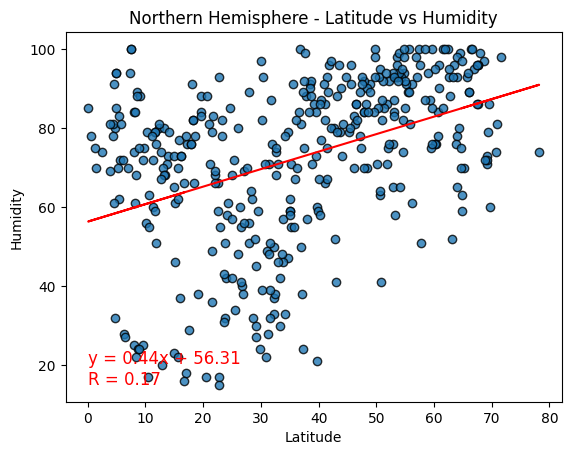

In [49]:
# Linear regression on Northern Hemisphere Humidity
# Define x and y values for Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(x_values_northern, y_values_northern)

# Calculate the regression line
regress_values = x_values_northern * slope + intercept

# Create equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value**2:.2f}"

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Plot regression line
plt.plot(x_values_northern, regress_values, color="red")

# Annotate equation on the plot
plt.annotate(equation, (x_values_northern.min(), y_values_northern.min()), fontsize=12, color="red")

# Incorporate graph properties
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(False)

# Save the figure
plt.savefig("Northern_Lat_vs_Humidity.png")

# Show the plot
plt.show()


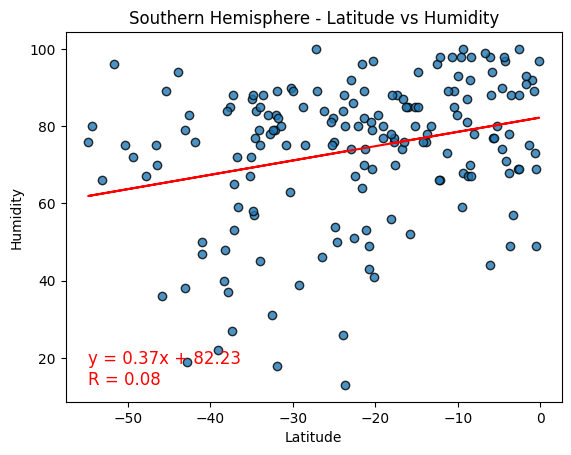

In [50]:
# Linear regression on Southern Hemisphere 
# Define x and y values for Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(x_values_southern, y_values_southern)

# Calculate the regression line
regress_values = x_values_southern * slope + intercept

# Create equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value**2:.2f}"

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Plot regression line
plt.plot(x_values_southern, regress_values, color="red")

# Annotate equation on the plot
plt.annotate(equation, (x_values_southern.min(), y_values_southern.min()), fontsize=12, color="red")

# Incorporate graph properties
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(False)

# Save the figure
plt.savefig("Southern_Lat_vs_Humidity.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

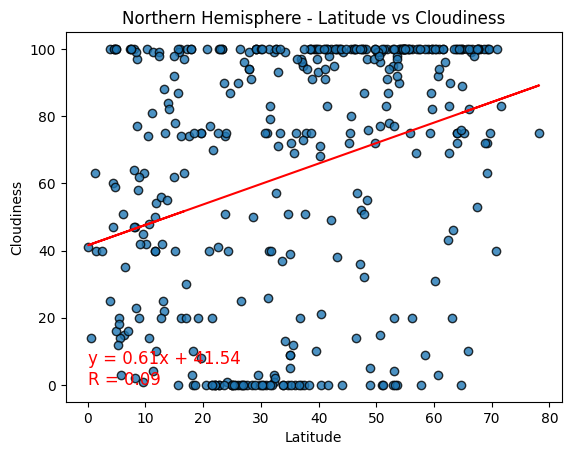

In [51]:
# Linear regression on Northern Hemisphere Cloudiness
# Define x and y values for Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(x_values_northern, y_values_northern)

# Calculate the regression line
regress_values = x_values_northern * slope + intercept

# Create equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value**2:.2f}"

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Plot regression line
plt.plot(x_values_northern, regress_values, color="red")

# Annotate equation on the plot
plt.annotate(equation, (x_values_northern.min(), y_values_northern.min()), fontsize=12, color="red")

# Incorporate graph properties
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(False)

# Save the figure
plt.savefig("Northern_Lat_vs_Cloudiness.png")

# Show the plot
plt.show()


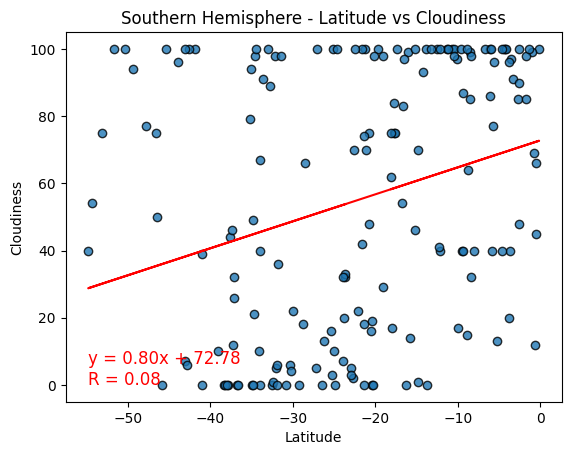

In [52]:
# Linear regression on Southern Hemisphere Cloudiness
# Define x and y values for Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(x_values_southern, y_values_southern)

# Calculate the regression line
regress_values = x_values_southern * slope + intercept

# Create equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value**2:.2f}"

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Plot regression line
plt.plot(x_values_southern, regress_values, color="red")

# Annotate equation on the plot
plt.annotate(equation, (x_values_southern.min(), y_values_southern.min()), fontsize=12, color="red")

# Incorporate graph properties
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(False)

# Save the figure
plt.savefig("Southern_Lat_vs_Cloudiness.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

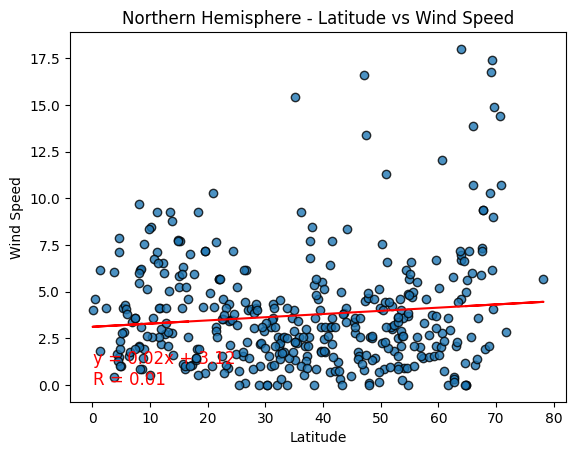

In [53]:
# Linear regression on Northern Hemisphere Wind Speed
# Define x and y values for Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(x_values_northern, y_values_northern)

# Calculate the regression line
regress_values = x_values_northern * slope + intercept

# Create equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value**2:.2f}"

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Plot regression line
plt.plot(x_values_northern, regress_values, color="red")

# Annotate equation on the plot
plt.annotate(equation, (x_values_northern.min(), y_values_northern.min()), fontsize=12, color="red")

# Incorporate graph properties
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(False)

# Save the figure
plt.savefig("Northern_Lat_vs_Wind Speed.png")

# Show the plot
plt.show()


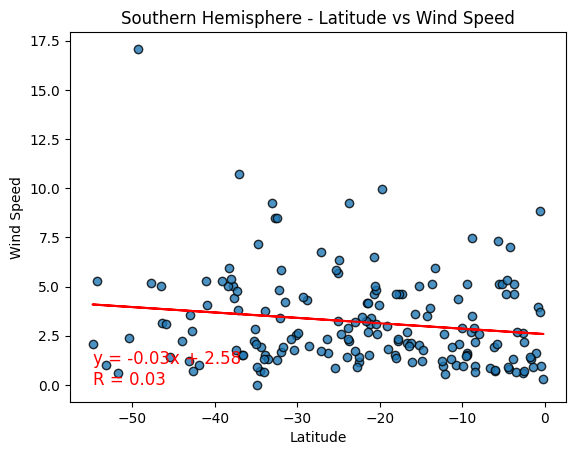

In [54]:
# Linear regression on Southern Hemisphere Wind Speed
# Define x and y values for Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = linregress(x_values_southern, y_values_southern)

# Calculate the regression line
regress_values = x_values_southern * slope + intercept

# Create equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value**2:.2f}"

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Plot regression line
plt.plot(x_values_southern, regress_values, color="red")

# Annotate equation on the plot
plt.annotate(equation, (x_values_southern.min(), y_values_southern.min()), fontsize=12, color="red")

# Incorporate graph properties
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(False)

# Save the figure
plt.savefig("Southern_Lat_vs_Wind Speed.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE